In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.ticker as mticker

In [2]:
def read_json(path):
    with open(path, 'r') as f:
        data = json.load(f)
    return data

def plot_ap(res):
    fig, ax = plt.subplots(figsize=(12,8))
    ax.set_xlabel('threshold [m]', fontsize=14)
    ax.set_ylabel('Average Precision', fontsize=14)

    for cls, ap_dict in res['ap'].items():
        thrs = [t.replace('m', '') for t in ap_dict.keys()]
        ax.plot(thrs, ap_dict.values(), label=cls)
    
    ax.legend(fontsize=16, ncol=2)
    ax.tick_params(axis='both', which='major', labelsize=14)
    
    plt.show()
    
    
def plot_precision_recall(res):
    fig, ax = plt.subplots(figsize=(8,8))
    ax.set_xlabel('recall', fontsize=14)
    ax.set_ylabel('precision', fontsize=14)

    for cls in res['precision'].keys():
        rec_dict = res['recall'][cls]
        prec_dict = score_dict['0.5']
        thrs = [t.replace('m', '') for t in prec_dict.keys()]
        ax.plot(thrs, prec_dict.values(), label=cls)
    
    ax.legend(fontsize=16, ncol=2)
    ax.tick_params(axis='both', which='major', labelsize=14)
    
    plt.show()

In [39]:
res_cls = read_json('data/result_IA_vs_videocoding/results_cls.json')
res_det = read_json('data/result_IA_vs_videocoding/results_det.json')
res_seg = read_json('data/result_IA_vs_videocoding/results_seg.json')
res_videocoder = read_json('data/result_IA_vs_videocoding/results_videocoder.json')

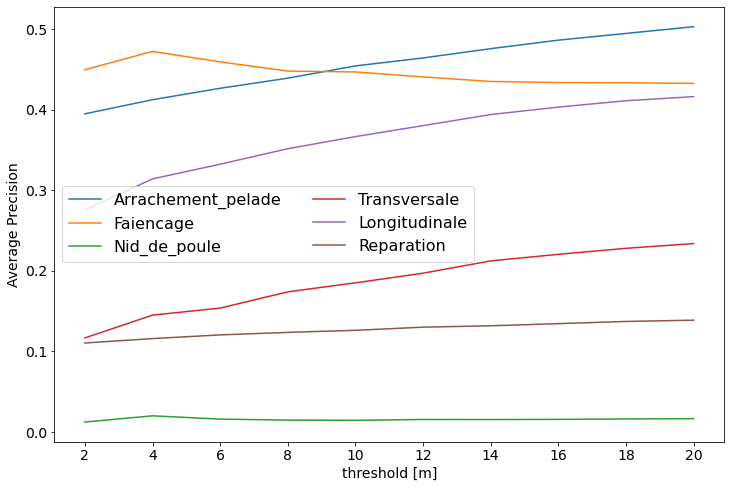

In [22]:
plot_ap(res_cls)

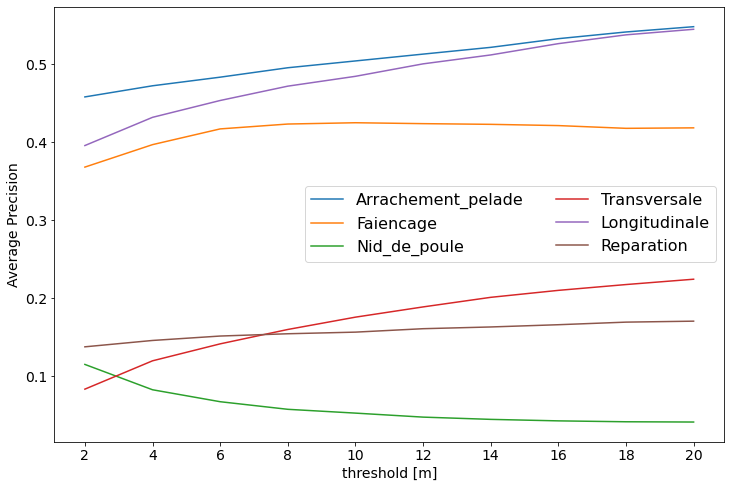

In [23]:
plot_ap(res_det)

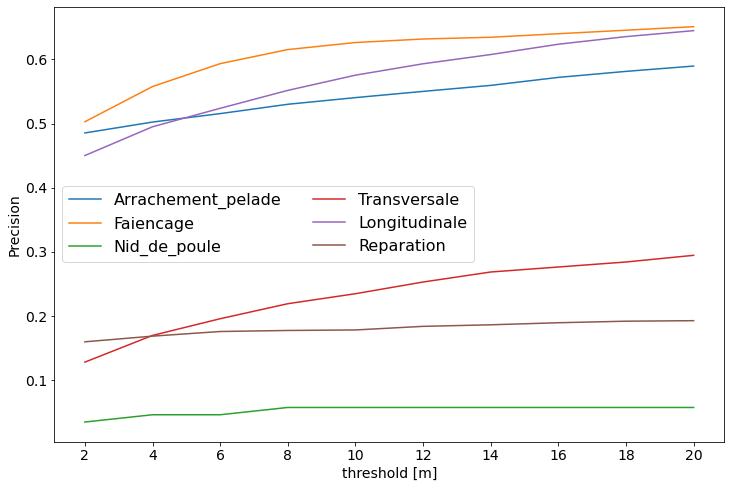

In [20]:
plot_precision_recall(res_det, 'precision', 'Precision')


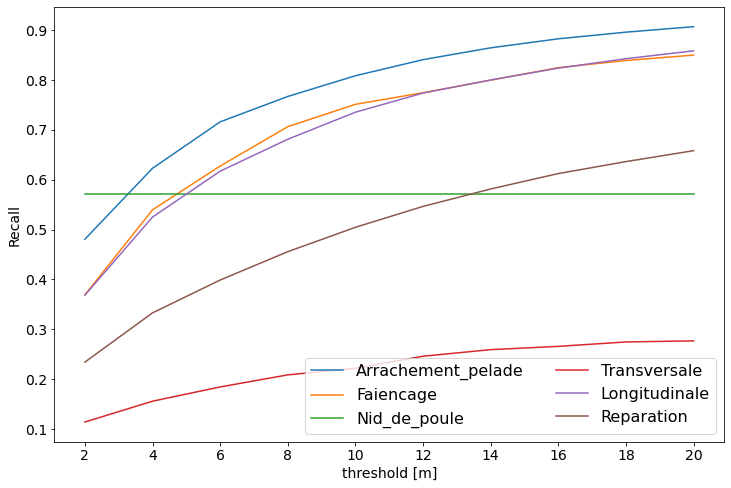

In [38]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_xlabel('threshold [m]', fontsize=14)
ax.set_ylabel('Recall', fontsize=14)

for cls, score_dict in res_det['recall'].items():
    prec_dict = score_dict['0.5']
    thrs = [t.replace('m', '') for t in prec_dict.keys()]
    ax.plot(thrs, prec_dict.values(), label=cls)
    
ax.legend(fontsize=16, ncol=2)
ax.tick_params(axis='both', which='major', labelsize=14)

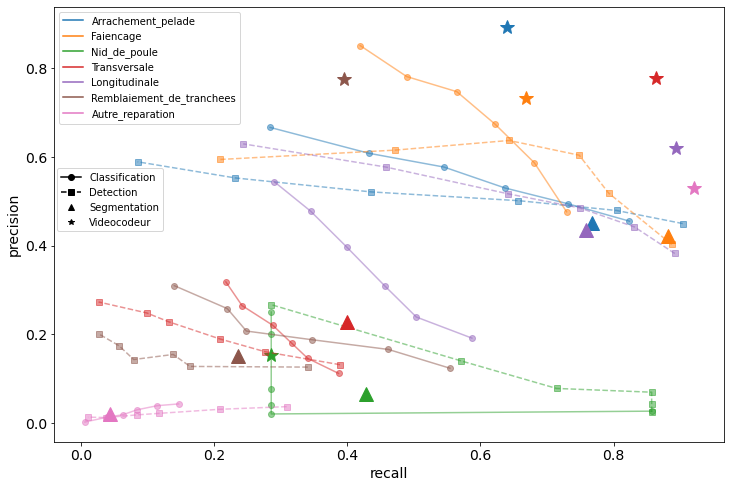

In [91]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_xlabel('recall', fontsize=14)
ax.set_ylabel('precision', fontsize=14)

class_legend = []

for cls in res_cls['precision'].keys():
    recall_list_cls = [ res_cls['recall'][cls][score]['6m'] for score in res_cls['recall'][cls].keys() ]
    precision_list_cls = [ res_cls['precision'][cls][score]['6m'] for score in res_cls['recall'][cls].keys() ]
    line, = ax.plot(recall_list_cls, precision_list_cls, marker='o', alpha=0.5)
    
    recall_list_det = [ res_det['recall'][cls][score]['6m'] for score in res_det['recall'][cls].keys() ]
    precision_list_det = [ res_det['precision'][cls][score]['6m'] for score in res_det['recall'][cls].keys() ]
    ax.plot(recall_list_det, precision_list_det, marker='s', color=line.get_color(), linestyle='--', alpha=0.5)
    
    seg_recall = [res_seg['recall'][cls]['0.0']['6m']]
    seg_precision = [res_seg['precision'][cls]['0.0']['6m']]
    ax.plot(seg_recall, seg_precision, color=line.get_color(), marker='^', markersize=14)

    vid_recall = [res_videocoder['recall'][cls]['6m']]
    vid_precision = [res_videocoder['precision'][cls]['6m']]
    ax.plot(vid_recall, vid_precision, color=line.get_color(), marker='*', markersize=14)
    
    class_legend.append(mlines.Line2D([], [], color=line.get_color(), marker=None, label=cls))

cl = ax.legend(handles=class_legend, loc='upper left')
ax.add_artist(cl)

cls_legend = mlines.Line2D([], [], color='black', marker='o', label='Classification')
det_legend = mlines.Line2D([], [], color='black', marker='s', linestyle='--', label='Detection')
seg_legend = mlines.Line2D([], [], color='black', marker='^', linestyle='', label='Segmentation')
vid_legend = mlines.Line2D([], [], color='black', marker='*', linestyle='', label='Videocodeur')
ax.legend(handles=[cls_legend, det_legend, seg_legend, vid_legend], bbox_to_anchor=(0.17, 0.64))
ax.tick_params(axis='both', which='major', labelsize=14)

plt.show()

## compare detection performance before and after updating annotations

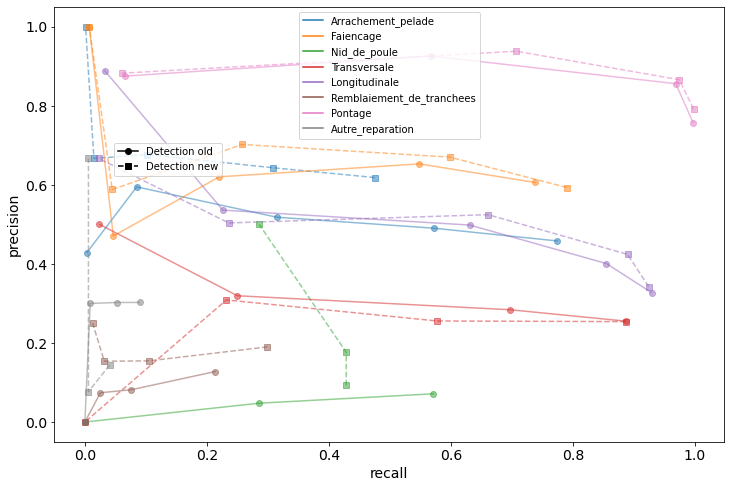

In [5]:
res_det_old = read_json('data/result_IA_vs_videocoding/results_dyhead_swin_20230301.json')
res_det_new = read_json('data/result_IA_vs_videocoding/results_dyhead_swin_20230327.json')

fig, ax = plt.subplots(figsize=(12,8))
ax.set_xlabel('recall', fontsize=14)
ax.set_ylabel('precision', fontsize=14)

class_legend = []

for cls in res_det_new['precision'].keys():
    try:
        recall_list_det_old = [ res_det_old['recall'][cls][score]['6m'] for score in res_det_old['recall'][cls].keys() ]
        precision_list_det_old = [ res_det_old['precision'][cls][score]['6m'] for score in res_det_old['recall'][cls].keys() ]
        line, = ax.plot(recall_list_det_old, precision_list_det_old, marker='o', alpha=0.5)
    except:
        print('')
    
    recall_list_det_new = [ res_det_new['recall'][cls][score]['6m'] for score in res_det_new['recall'][cls].keys() ]
    precision_list_det_new = [ res_det_new['precision'][cls][score]['6m'] for score in res_det_new['recall'][cls].keys() ]
    ax.plot(recall_list_det_new, precision_list_det_new, marker='s', color=line.get_color(), linestyle='--', alpha=0.5)
        
    class_legend.append(mlines.Line2D([], [], color=line.get_color(), marker=None, label=cls))

cl = ax.legend(handles=class_legend, loc='best')
ax.add_artist(cl)

det_old_legend = mlines.Line2D([], [], color='black', marker='o', label='Detection old')
det_new_legend = mlines.Line2D([], [], color='black', marker='s', linestyle='--', label='Detection new')
ax.legend(handles=[det_old_legend, det_new_legend], bbox_to_anchor=(0.17, 0.6))
ax.tick_params(axis='both', which='major', labelsize=14)

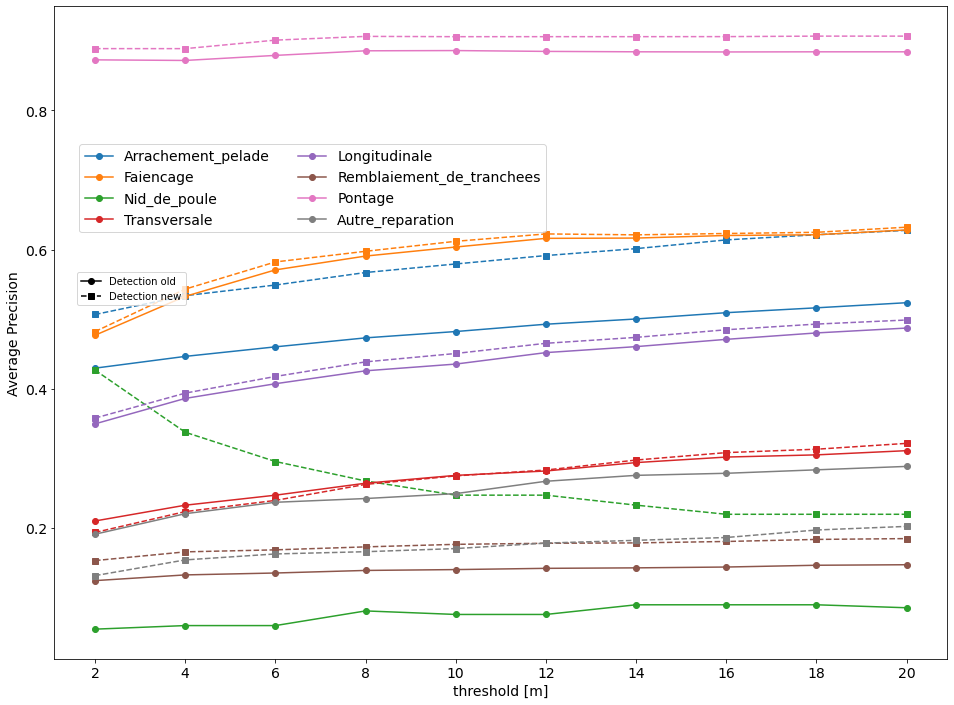

In [6]:
fig, ax = plt.subplots(figsize=(16,12))
ax.set_xlabel('threshold [m]', fontsize=14)
ax.set_ylabel('Average Precision', fontsize=14)

for cls, ap_dict in res_det_old['ap'].items():
    thrs = [t.replace('m', '') for t in ap_dict.keys()]
    line, = ax.plot(thrs, ap_dict.values(), label=cls, marker='o')
    ax.plot(thrs, res_det_new['ap'][cls].values(), marker='s', linestyle='--', color=line.get_color())

cl = ax.legend(fontsize=14, ncol=2, loc='upper left', bbox_to_anchor=(0.02, 0.8))
ax.add_artist(cl)

det_old_legend = mlines.Line2D([], [], color='black', marker='o', label='Detection old')
det_new_legend = mlines.Line2D([], [], color='black', marker='s', linestyle='--', label='Detection new')
ax.legend(handles=[det_old_legend, det_new_legend], loc='upper left', bbox_to_anchor=(0.02, 0.6))

ax.tick_params(axis='both', which='major', labelsize=14)

plt.show()

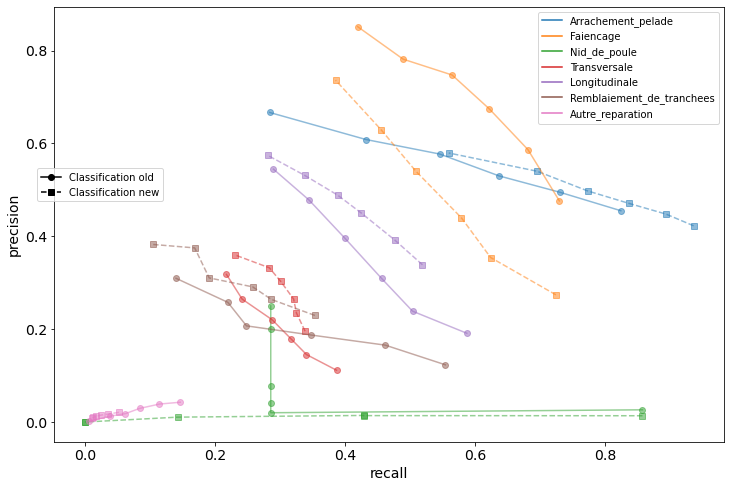

In [9]:
res_cls_old = read_json('data/result_IA_vs_videocoding/202210/results_cls.json')
res_cls_new = read_json('data/result_IA_vs_videocoding/20221110/results_cls.json')

fig, ax = plt.subplots(figsize=(12,8))
ax.set_xlabel('recall', fontsize=14)
ax.set_ylabel('precision', fontsize=14)

class_legend = []

for cls in res_cls_new['precision'].keys():
    recall_list_cls_old = [ res_cls_old['recall'][cls][score]['6m'] for score in res_cls_old['recall'][cls].keys() ]
    precision_list_cls_old = [ res_cls_old['precision'][cls][score]['6m'] for score in res_cls_old['recall'][cls].keys() ]
    line, = ax.plot(recall_list_cls_old, precision_list_cls_old, marker='o', alpha=0.5)
    
    recall_list_cls_new = [ res_cls_new['recall'][cls][score]['6m'] for score in res_cls_new['recall'][cls].keys() ]
    precision_list_cls_new = [ res_cls_new['precision'][cls][score]['6m'] for score in res_cls_new['recall'][cls].keys() ]
    ax.plot(recall_list_cls_new, precision_list_cls_new, marker='s', color=line.get_color(), linestyle='--', alpha=0.5)
        
    class_legend.append(mlines.Line2D([], [], color=line.get_color(), marker=None, label=cls))

cl = ax.legend(handles=class_legend, loc='best')
ax.add_artist(cl)

cls_old_legend = mlines.Line2D([], [], color='black', marker='o', label='Classification old')
cls_new_legend = mlines.Line2D([], [], color='black', marker='s', linestyle='--', label='Classification new')
ax.legend(handles=[cls_old_legend, cls_new_legend], bbox_to_anchor=(0.17, 0.64))
ax.tick_params(axis='both', which='major', labelsize=14)

## Recall per video (score threshold=0.3, distance threshold=6m)

In [47]:
import glob
json_list = glob.glob('data/result_IA_vs_videocoding/20221116/*')
json_list.sort()
res_list = [read_json(vid) for vid in json_list]
name_list = [vid.split('/')[-1].replace('.json', '') for vid in json_list]

color_list = ['red', 'red', 'red', 
             'blue', 'blue', 'blue',
             'black', 'black', 'black',
             'm', 'm',
             'green', 'green', 'green']
marker_list = ['o', '^', 's',
              'o', '^', 's',
              'o', '^', 's',
              'o', '^',
              'o', '^', 's']

<ipython-input-55-af4f7ac453e2>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(classes, rotation=45, ha='right')


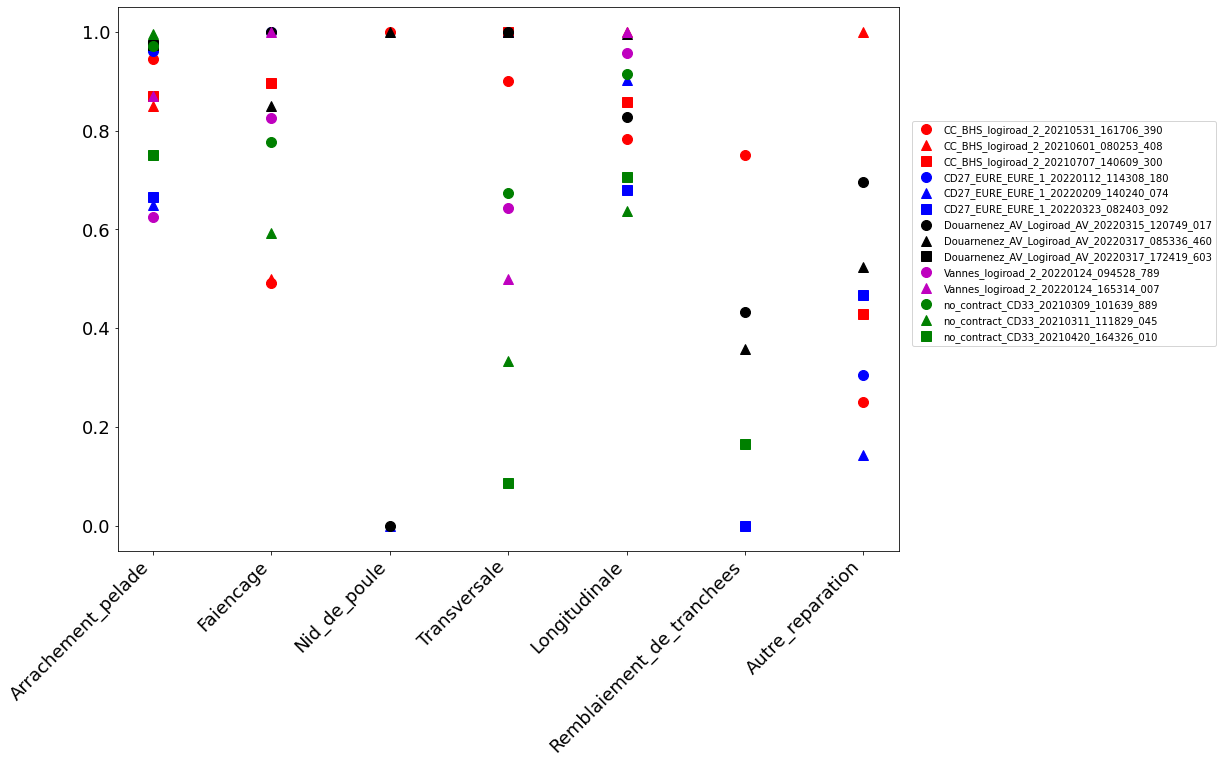

In [55]:
fig, ax = plt.subplots(figsize=(14,10))

for res, vid, marker, col in zip(res_list, name_list, marker_list, color_list):
    classes = list(res['recall'].keys())
    recall = [i['0.3']['6m'] for k,i in res['recall'].items()]
    ax.plot(classes, recall, marker=marker, color=col, linestyle='None', label=vid, markersize=10)

ax.set_xticklabels(classes, rotation=45, ha='right')   
ax.tick_params(axis='both', which='major', labelsize=18)
plt.legend(bbox_to_anchor=(1.01, 0.8))

## extract class AP with 6m threshold

In [8]:
res_det = read_json('data/result_IA_vs_videocoding/results_dyhead_swin_20230327.json')


for cls, ap_dict in res_det['ap'].items():
    print(cls, f'{ap_dict["6m"]:.3f}')


Arrachement_pelade 0.549
Faiencage 0.582
Nid_de_poule 0.296
Transversale 0.240
Longitudinale 0.418
Remblaiement_de_tranchees 0.169
Pontage 0.901
Autre_reparation 0.163


## Compare AI and 4 videocoders

In [22]:
# score thresholds used for single summary figures                                                                                                                                                            
score_thresholds = {
    'Arrachement_pelade' : 0.14,
    'Faiencage' : 0.31,
    'Nid_de_poule' : 0.47,
    'Transversale' : 0.36,
    'Longitudinale' : 0.49,
    'Remblaiement_de_tranchees' : 0.15,
    'Autre_reparation' : 0.01,
    'Pontage' : 0.44,
}
    
distance_thr = '10m'

### Gaetan as reference

In [16]:
res_ai = read_json('/home/thmegy/mountfinn/ai-vs-videocoding/results_comparison/det/Gaetan/results.json')
res_ai_old = read_json('data/result_IA_vs_videocoding/20221122/results_det.json')
res_leo = read_json('/home/thmegy/mountfinn/ai-vs-videocoding/results_comparison/videocoders/Gaetan_vs_Leo/results.json')
res_nestor = read_json('/home/thmegy/mountfinn/ai-vs-videocoding/results_comparison/videocoders/Gaetan_vs_Nestor/results.json')
res_olivier = read_json('/home/thmegy/mountfinn/ai-vs-videocoding/results_comparison/videocoders/Gaetan_vs_Olivier/results.json')

In [34]:
cls_list = []
ai_list = []
leo_list = []
nestor_list = []
olivier_list = []
for (cls, ai), leo, nestor, olivier in zip(res_ai.items(), res_leo['f1_score'].values(),
                                           res_nestor['f1_score'].values(), res_olivier['f1_score'].values()):
    cls_list.append(cls)
    
    # find available score closest to inputed threshold
    sthrs = np.array([float(t) for t in ai[distance_thr].keys() if t not in ['ap', 'ar']])
    closest_id = np.argmin(np.abs(sthrs-score_thresholds[cls]))
    sthr = f'{sthrs[closest_id]:.3f}'
    ai_list.append(ai[distance_thr][sthr]['f1_score'])
    
    leo_list.append(leo[distance_thr])
    nestor_list.append(nestor[distance_thr])
    olivier_list.append(olivier[distance_thr])

In [21]:
score_thresholds_old = {
    'Arrachement_pelade' : '0.5',
    'Faiencage' : '0.5',
    'Nid_de_poule' : '0.6',
    'Transversale' : '0.5',
    'Longitudinale' : '0.6',
    'Remblaiement_de_tranchees' : '0.3',
    'Autre_reparation' : '0.5',
    'Pontage' : '0.6',
}

ai_old_list = []
for rec, prec in zip(res_ai_old['recall'].values(), res_ai_old['precision'].values()):
    rec = rec[score_thresholds_old[cls]][distance_thr]
    prec = prec[score_thresholds_old[cls]][distance_thr]  
    ai_old_list.append(2*rec*prec / (rec+prec))

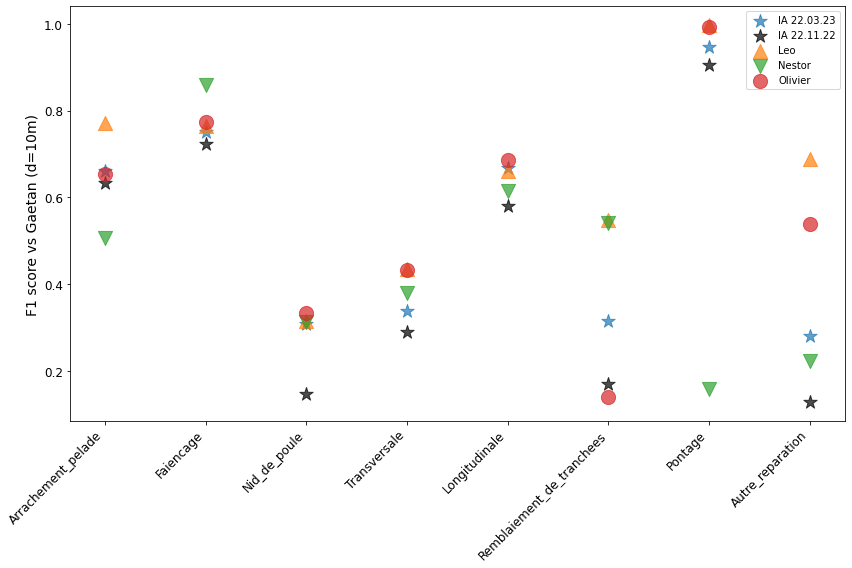

In [30]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(np.arange(len(cls_list)), ai_list, label='IA 22.03.23', marker='*', s=200, alpha=0.7)
ax.scatter(np.arange(len(cls_list)), ai_old_list, label='IA 22.11.22', marker='*', color='black', s=200, alpha=0.7)
ax.scatter(np.arange(len(cls_list)), leo_list, label='Leo', marker='^', s=200, alpha=0.7)
ax.scatter(np.arange(len(cls_list)), nestor_list, label='Nestor', marker='v', s=200, alpha=0.7)
ax.scatter(np.arange(len(cls_list)), olivier_list, label='Olivier', s=200, alpha=0.7)

ax.set_ylabel('F1 score vs Gaetan (d=10m)', fontsize=14)
ax.xaxis.set_ticks(np.arange(8))
ax.set_xticklabels(cls_list, rotation=45, ha='right')   
ax.tick_params(axis='both', which='major', labelsize=12)

plt.legend()
fig.patch.set_facecolor('white')
plt.tight_layout()
plt.show()

In [124]:
videocoders = ['Gaetan', 'Leo', 'Nestor', 'Olivier', 'AI']                                                                                                                                                                       


In [127]:
f1_matrix = [] # (N_videocoders, N_videocoders, N_classes)
fp_rate_matrix = [] # taux de détection à tort = 1-precision (N_videocoders, N_videocoders, N_classes)
                    # inversion of reference is equivalent to (precision, recall) --> (recall, precision)

for iv, videocoder_1 in enumerate(videocoders):
    # videocoder_1 is compared to videocoder_2
    f1_list = []
    fp_rate_list = []
    fn_rate_list = []
    for videocoder_2 in videocoders:
        # videocoder_2 is the reference
        if videocoder_1 == videocoder_2:
            f1_list_cls = [1 for _ in range(8)] # hard-coded number of class...
            fp_list_cls = [0 for _ in range(8)]
        else:
            f1_list_cls = []
            fp_list_cls = []
            if 'AI' in [videocoder_1, videocoder_2]:
                vid = videocoder_1 if videocoder_1!='AI' else videocoder_2
                res_ai = read_json(f'/home/thmegy/mountfinn/ai-vs-videocoding/results_comparison/det/{vid}/results.json')
                for (cls, ai) in res_ai.items():
                    # find available score closest to inputed threshold
                    sthrs = np.array([float(t) for t in ai[distance_thr].keys() if t not in ['ap', 'ar']])
                    closest_id = np.argmin(np.abs(sthrs-score_thresholds[cls]))
                    sthr = f'{sthrs[closest_id]:.3f}'

                    f1_list_cls.append(ai[distance_thr][sthr]['f1_score'])
                    # by default, human videocoders as taken as reference when compared to AI
                    # inversion of reference is equivalent to (precision, recall) --> (recall, precision)
                    if videocoder_1=='AI':
                        fp_list_cls.append(1-ai[distance_thr][sthr]['precision'])
                    else:
                        fp_list_cls.append(1-ai[distance_thr][sthr]['recall'])

            else:
                inv_ref = False # Who is reference in input data ?
                try:
                    res = read_json(f'/home/thmegy/mountfinn/ai-vs-videocoding/results_comparison/videocoders/{videocoder_1}_vs_{videocoder_2}/results.json')
                except:
                    res = read_json(f'/home/thmegy/mountfinn/ai-vs-videocoding/results_comparison/videocoders/{videocoder_2}_vs_{videocoder_1}/results.json')
                    inv_ref = True
                    
                for cls, d in res['f1_score'].items():
                    f1_list_cls.append(d[distance_thr])
                if inv_ref:
                    for cls, d in res['precision'].items():
                        fp_list_cls.append(1-d[distance_thr])
                else:
                    for cls, d in res['recall'].items():
                        fp_list_cls.append(1-d[distance_thr])
        f1_list.append(f1_list_cls)
        fp_rate_list.append(fp_list_cls)
        
    f1_matrix.append(f1_list)
    fp_rate_matrix.append(fp_rate_list)
        
f1_matrix = np.array(f1_matrix)
fp_rate_matrix = np.array(fp_rate_matrix)

In [111]:
class_names = list(res['f1_score'].keys())

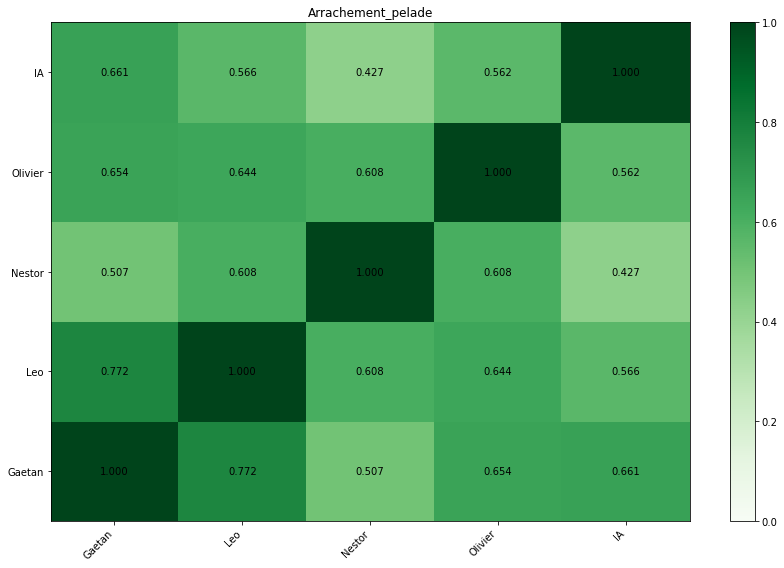

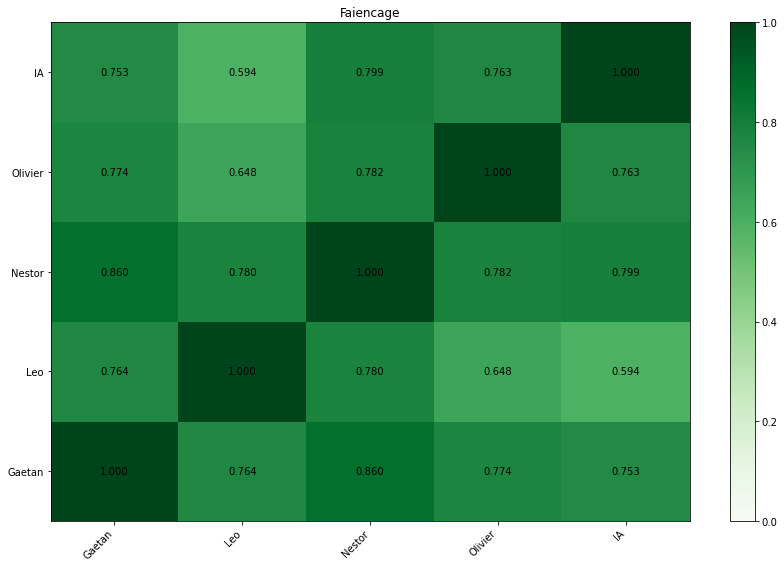

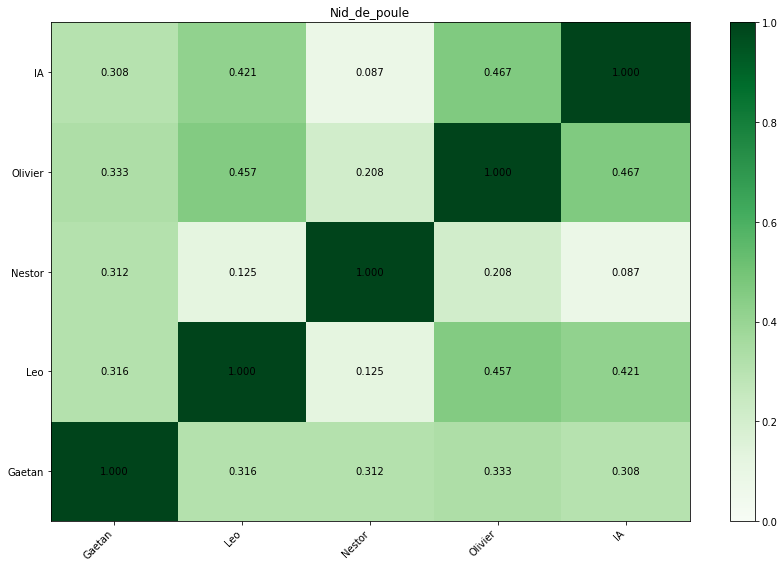

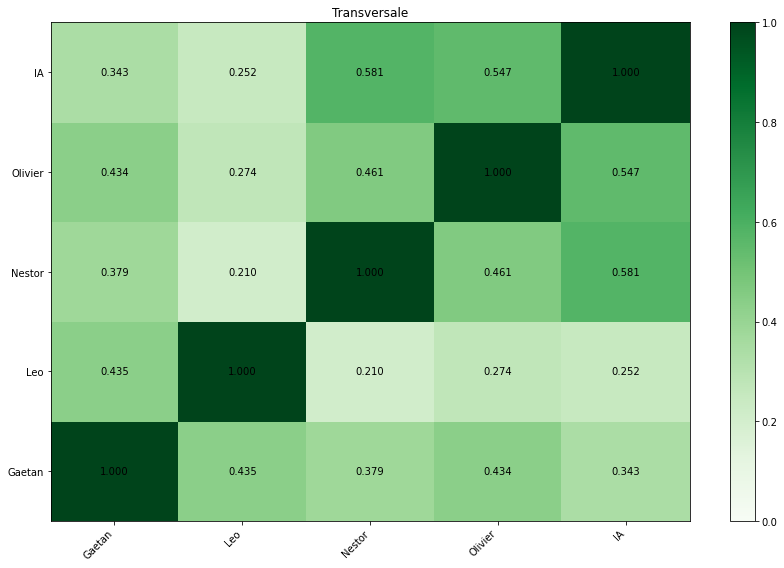

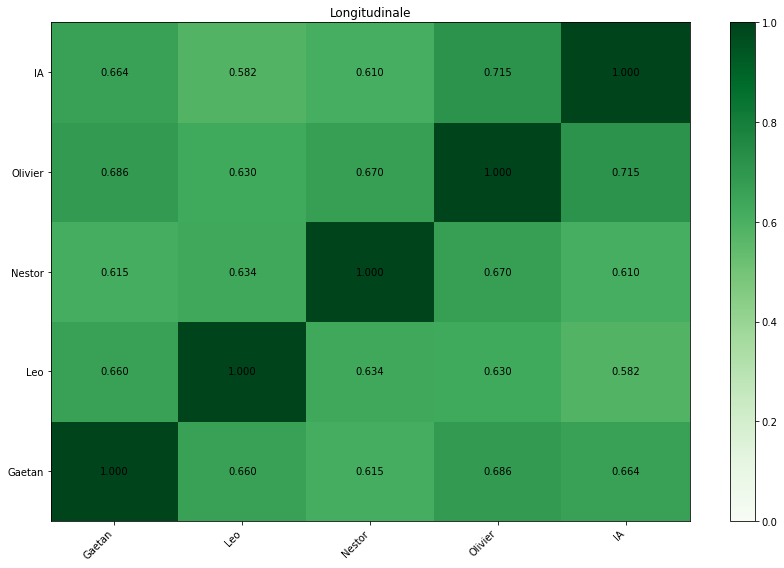

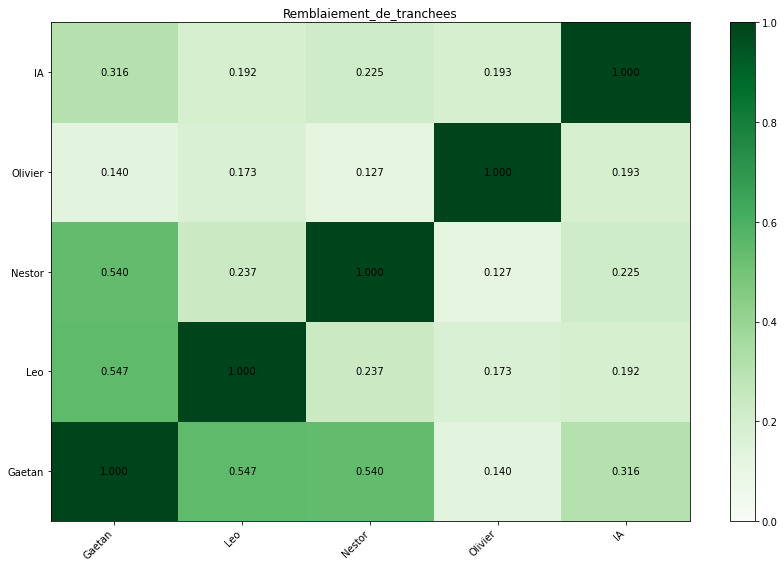

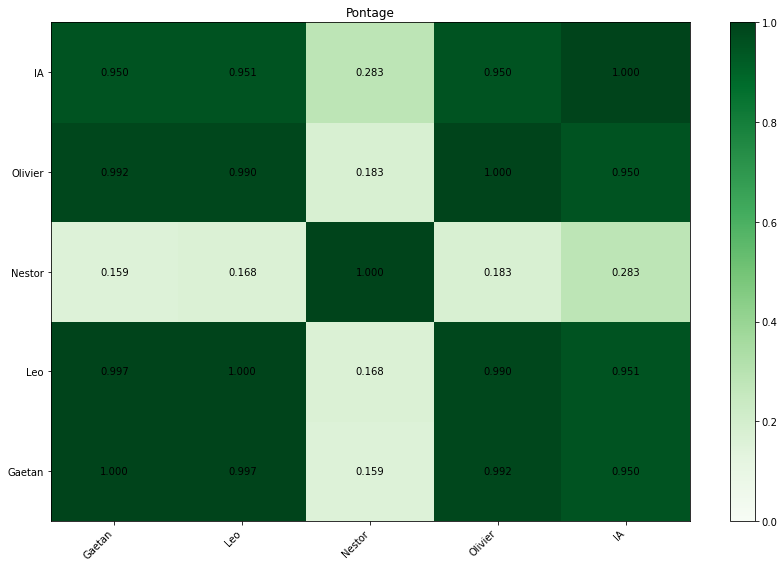

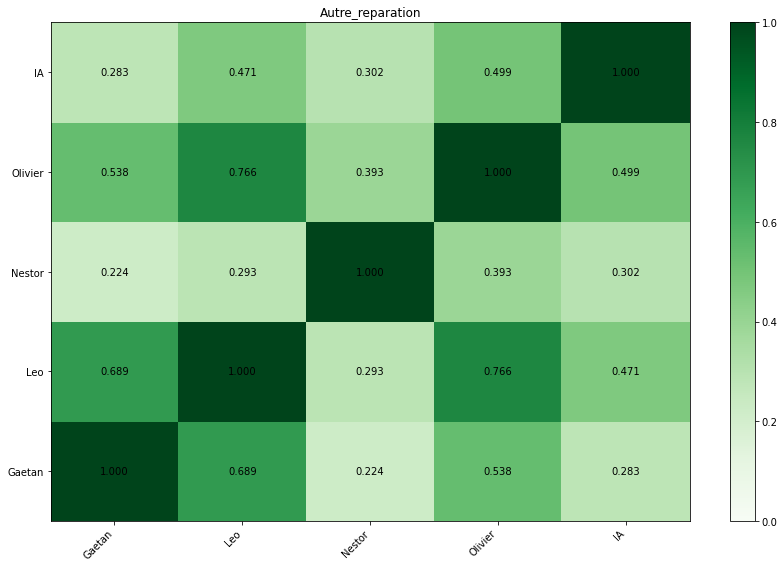

In [77]:
for ic, cls in enumerate(class_names):
    fig, ax = plt.subplots(figsize=(12,8))
    opts = {'cmap': 'Greens', 'vmin': 0, 'vmax': +1}

    heatmap = ax.pcolor(f1_matrix[:,:,ic], **opts)
    for irow in range(f1_matrix[:,:,ic].shape[0]):
        for icol in range(f1_matrix[:,:,ic].shape[1]):
            ax.text(icol+0.5, irow+0.5, '{:.3f}'.format(f1_matrix[:,:,ic][irow][icol]),
                    ha="center", va="center", color="black")

    ax.set_yticks(np.arange(0.5, f1_matrix.shape[0], 1))
    ax.set_yticklabels(videocoders)
    ax.set_xticks(np.arange(0.5, f1_matrix.shape[0], 1))
    ax.set_xticklabels(videocoders, rotation=45, ha='right')
    ax.set_title(cls)
    cbar = plt.colorbar(heatmap)
    plt.tight_layout()

In [141]:
def plot_class_matrices(matrix, metric_name):
    fig, ax = plt.subplots(2,4, figsize=(28,9), sharex='col', sharey='row')
    ax = ax.flatten()

    for ic, cls in enumerate(class_names):
        opts = {'cmap': 'Greens', 'vmin': 0, 'vmax': +1}

        heatmap = ax[ic].pcolor(matrix[:,:,ic], **opts)
        for irow in range(matrix[:,:,ic].shape[0]):
            for icol in range(matrix[:,:,ic].shape[1]):
                ax[ic].text(icol+0.5, irow+0.5, '{:.3f}'.format(matrix[:,:,ic][irow][icol]),
                        ha="center", va="center", color="black")

        ax[ic].set_yticks(np.arange(0.5, matrix.shape[0], 1))
        ax[ic].set_yticklabels(videocoders)
        ax[ic].set_xticks(np.arange(0.5, matrix.shape[0], 1))
        ax[ic].set_xticklabels(videocoders, rotation=45, ha='right')
        ax[ic].set_title(cls)
        
        if ic%4 == 0:
            ax[ic].set_ylabel('Compared')
        if ic >= 4:
            ax[ic].set_xlabel('Reference')

        np.savetxt(f'/home/thmegy/Téléchargements/{metric_name}_{cls}.txt', matrix[:,:,ic],
                   delimiter=',', header=','.join(videocoders))
    
    cbar = fig.colorbar(heatmap, ax=ax.ravel().tolist())
    cbar.set_label(metric_name)
    fig.patch.set_facecolor('white')

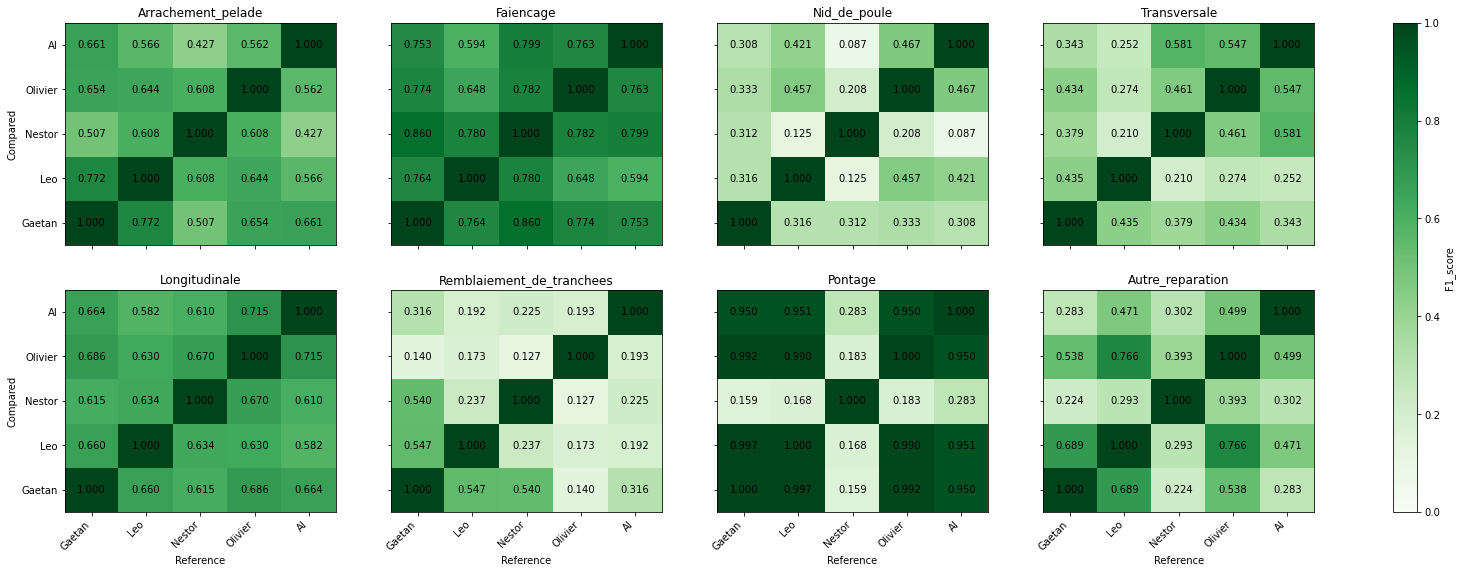

In [137]:
plot_class_matrices(f1_matrix, 'F1_score')

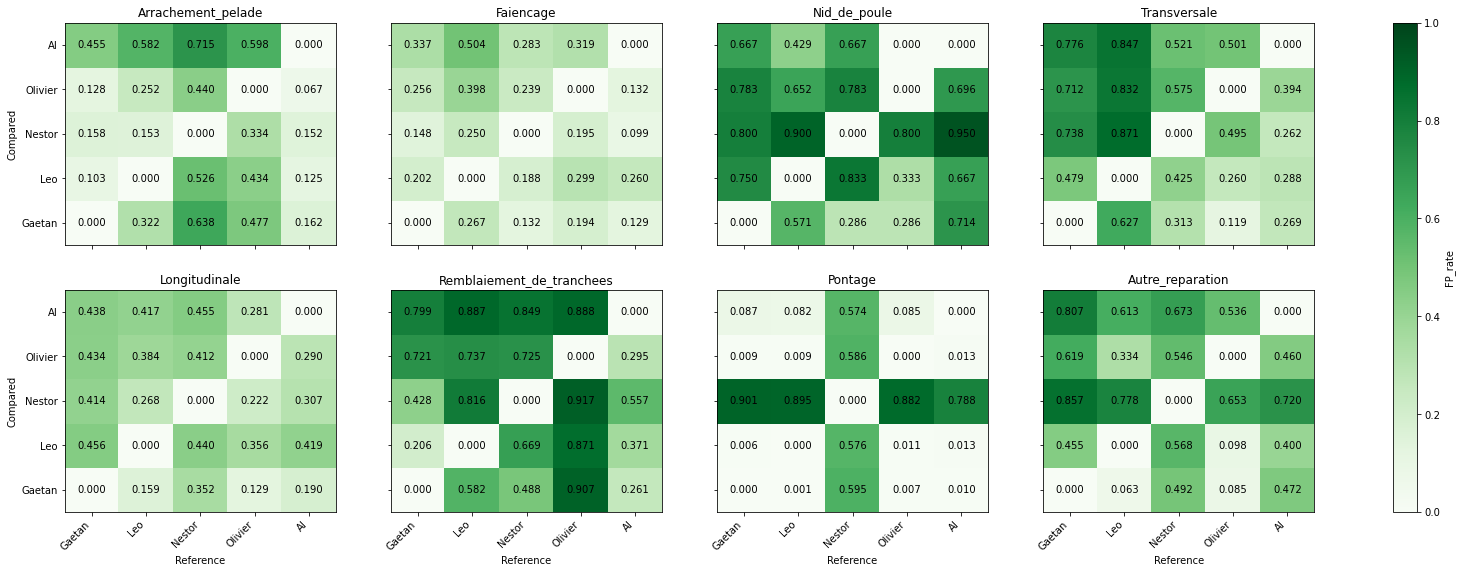

In [142]:
plot_class_matrices(fp_rate_matrix, 'FP_rate')

## Interpolate score threshold

In [8]:
from scipy import interpolate

In [4]:
res = read_json('data/result_IA_vs_videocoding/results_dyhead_swin_20230327_Combination.json')

In [146]:
dthr = '10m'
i=0
for cls, cls_dict in res.items():
    dthr_dict = cls_dict[dthr]

    sthr_list = []
    precision_list = []
    recall_list = []
    f1_list = []
    for sthr, sthr_dict in dthr_dict.items():
        if sthr == 'ap' or sthr == 'ar':
            continue
        sthr_list.append(float(sthr))
        precision_list.append(sthr_dict['precision'])
        recall_list.append(sthr_dict['recall'])
        f1_list.append(sthr_dict['f1_score'])
        
    maxf1_id_base = np.argmax(np.array(f1_list))
    xmax_base = np.array(sthr_list)[maxf1_id_base]
    
    f = interpolate.interp1d(sthr_list, f1_list, kind = 'cubic', bounds_error=False)
    xnew = np.linspace(0, 1,100)
    maxf1_id_interp = np.nanargmax(f(xnew))
    xmax_interp = xnew[maxf1_id_interp]
    
    print(cls, xmax_base, f'{xmax_interp:.3f}')
    
    if i ==3:
        break
    i += 1


Arrachement_pelade 0.258 0.273
Faiencage 0.327 0.323
Nid_de_poule 0.446 0.434
Transversale 0.361 0.303


In [147]:
f = interpolate.interp1d(sthr_list, f1_list, kind = 'cubic', bounds_error=False)

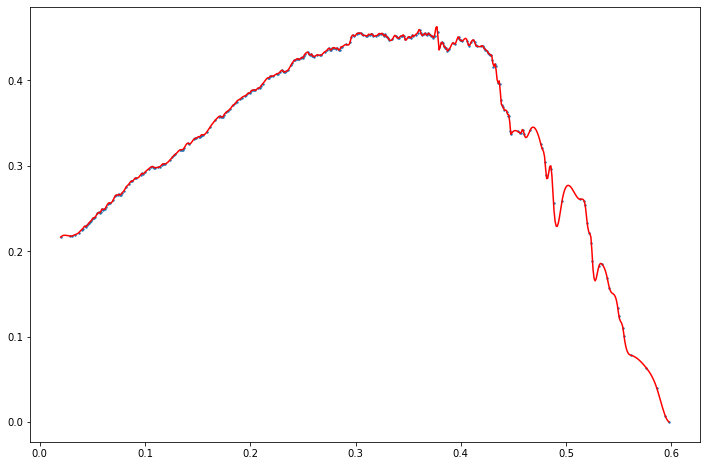

In [148]:
plt.figure(figsize=(12,8))
plt.scatter(sthr_list, f1_list, s=2)

xnew = np.linspace(0, 1,1000)
plt.plot(xnew, f(xnew), color='r')


0.3620816326530612

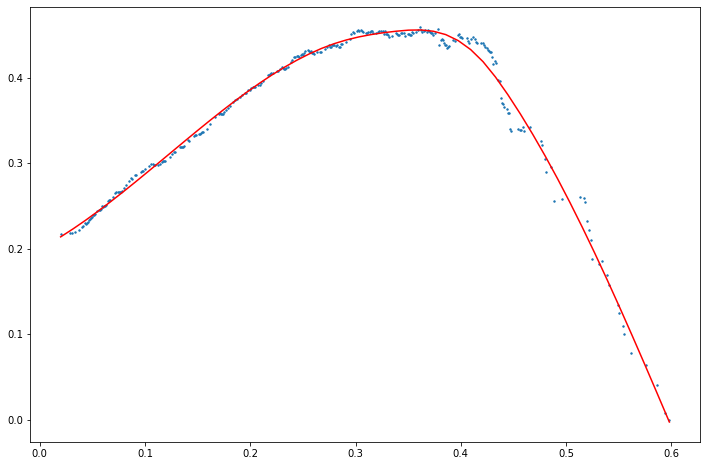

In [160]:
tck = interpolate.splrep(list(reversed(sthr_list)), list(reversed(f1_list)), s=0.025)

plt.figure(figsize=(12,8))

xnew = np.linspace(min(sthr_list), max(sthr_list), 50)
plt.scatter(sthr_list, f1_list, s=2)
plt.plot(xnew, interpolate.BSpline(*tck)(xnew), '-', label='s=3', color='r')

max_id = np.argmax(interpolate.BSpline(*tck)(xnew))
xnew[max_id]

0.16155102040816324

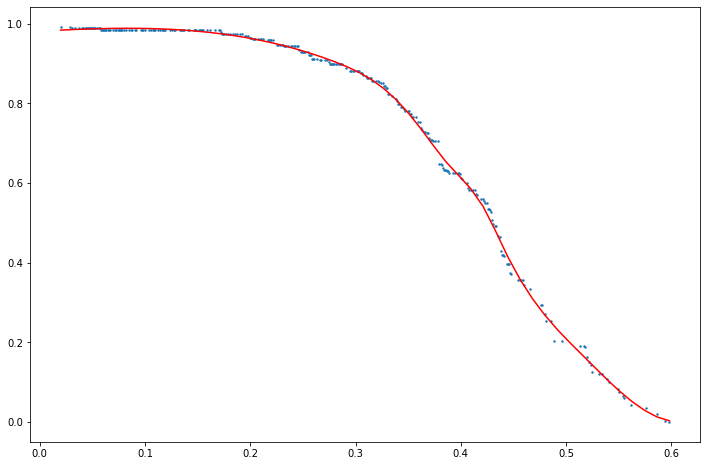

In [181]:
tck = interpolate.splrep(list(reversed(sthr_list)), list(reversed(recall_list)), s=0.025)

plt.figure(figsize=(12,8))

xnew = np.linspace(min(sthr_list), max(sthr_list), 50)
plt.scatter(sthr_list, recall_list, s=2)
plt.plot(xnew, interpolate.BSpline(*tck)(xnew), '-', label='s=3', color='r')

tolerance = 0.02
diff = (1-tolerance) - interpolate.BSpline(*tck)(xnew)
tol_id = np.argmin(diff[diff>0])
xnew[diff>0][tol_id]

In [179]:
diff

array([-0.03372316, -0.03515813, -0.03637339, -0.03733033, -0.03799035,
       -0.03831484, -0.03826521, -0.03780284, -0.03688915, -0.03548551,
       -0.03355334, -0.03105402, -0.02794896, -0.02419954, -0.01976718,
       -0.01461326, -0.00869918, -0.00198634,  0.00556387,  0.01399004,
        0.02333078,  0.0336247 ,  0.04491041,  0.05743051,  0.07214444,
        0.09016899,  0.11262099,  0.14061721,  0.17476318,  0.21385855,
        0.2559587 ,  0.29613574,  0.32991075,  0.36388464,  0.40852961,
        0.469759  ,  0.53551725,  0.59292188,  0.64127976,  0.68247797,
        0.71840364,  0.75094387,  0.78198576,  0.81307667,  0.84372898,
        0.87270079,  0.89874896,  0.92063034,  0.93710181,  0.94692022])